## Cream-D visualization

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import librosa
import numpy as np
import os


In [2]:
Crema = "data/Crema-D/AudioWAV/"

In [3]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
print(Crema_df.Emotions.value_counts())

Emotions
disgust    1271
angry      1271
happy      1271
fear       1271
sad        1271
neutral    1087
Name: count, dtype: int64


In [11]:
Crema_df

,Emotions,Path
0,disgust,data/Crema-D/AudioWAV/1011_TAI_DIS_XX.wav
1,angry,data/Crema-D/AudioWAV/1056_WSI_ANG_XX.wav
2,neutral,data/Crema-D/AudioWAV/1052_IEO_NEU_XX.wav
3,disgust,data/Crema-D/AudioWAV/1056_WSI_DIS_XX.wav
4,angry,data/Crema-D/AudioWAV/1035_IOM_ANG_XX.wav
...,...,...
7437,angry,data/Crema-D/AudioWAV/1038_MTI_ANG_XX.wav
7438,angry,data/Crema-D/AudioWAV/1075_TIE_ANG_XX.wav
7439,fear,data/Crema-D/AudioWAV/1049_IOM_FEA_XX.wav
7440,happy,data/Crema-D/AudioWAV/1047_IEO_HAP_LO.wav


In [5]:
# LABEL_DICT = {0:'fear', 1:'neutral', 2:'happy',3:'angry', 4:'disgust', 5:'surprise',6:'sad'}

# Map emotion codes from RAVDESS filenames to emotion labels
emotion_map = {'0':'fear', '1':'neutral', '2':'happy',
                '3':'angry', '4':'disgust', '5':'surprise','6':'sad'}


# Color map for each emotion
color_map = {
    'neutral': 'blue',
    'happy': 'green',
    'sad': 'purple',
    'angry': 'red',
    'fear': 'orange',
    'disgust': 'brown',
    'surprise': 'pink'
}

In [6]:
# Define a function to extract prosodic features
def extract_prosodic_features(audio_path):
    y, sr = librosa.load(audio_path)
    
    # Extract intensity (RMS Energy)
    rms = librosa.feature.rms(y=y)[0] # Loudness (Intensity)
    
    # Extract pitch (Fundamental frequency)
    pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
    pitch_values = pitches[pitches > 0]
    
    # Calculate required parameters
    std_pitch = np.std(pitch_values)
    std_intensity = np.std(rms)
    
    return std_pitch, std_intensity


In [7]:
# Initialize lists to hold features and emotions
std_pitches = []
std_intensities = []
emotions = []
for i in Crema_df.iterrows():
    
    emotion = i[1][0]
    path = i[1][1]
    if emotion == 'sad' or emotion == 'angry':

        if path.endswith('.wav'):
            std_pitch, std_intensity = extract_prosodic_features(path)
            std_pitches.append(std_pitch)
            std_intensities.append(std_intensity)
            emotions.append(emotion)
        
        
# Convert lists to torch tensors
std_pitches = torch.tensor(std_pitches)
std_intensities = torch.tensor(std_intensities)


/tmp/ipykernel_216320/166874101.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  emotion = i[1][0]
/tmp/ipykernel_216320/166874101.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path = i[1][1]
/tmp/ipykernel_216320/166874101.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  emotion = i[1][0]
/tmp/ipykernel_216320/166874101.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version

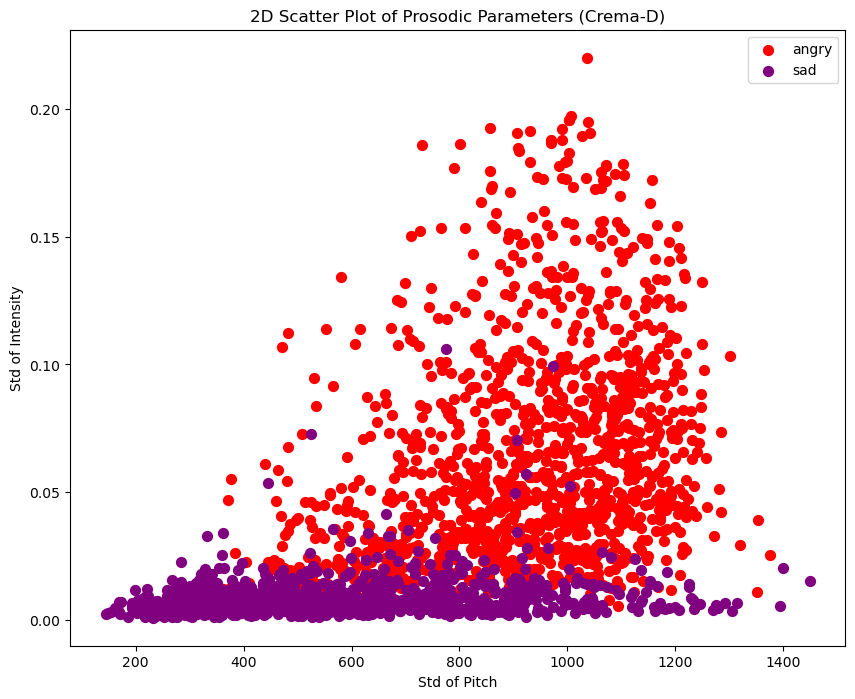

In [8]:
# Plotting the 2D scatter plot with different colors for each emotion
plt.figure(figsize=(10, 8))

# Scatter plot using the extracted features, with color based on emotion
for emotion in emotion_map.values():
    if emotion == "angry" or emotion == "sad":

        idx = [i for i, e in enumerate(emotions) if e == emotion]
        plt.scatter(std_pitches[idx], std_intensities[idx], 
                    c=color_map[emotion], label=emotion, s=50)

# Set labels and title
plt.xlabel('Std of Pitch')
plt.ylabel('Std of Intensity')
plt.title("2D Scatter Plot of Prosodic Parameters (Crema-D)")

# Add a legend
plt.legend()

# Display the plot
plt.show()

/tmp/ipykernel_216320/3472640268.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  emotion = i[1][0]
/tmp/ipykernel_216320/3472640268.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path = i[1][1]


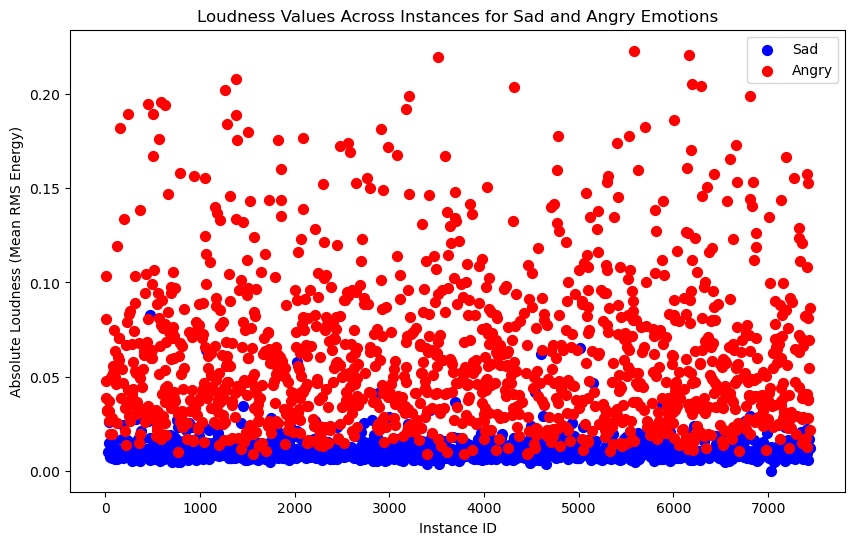

In [10]:
import librosa
import numpy as np
import torch
import matplotlib.pyplot as plt

# Function to extract absolute loudness
def extract_loudness(audio_path):
    y, sr = librosa.load(audio_path)
    rms = librosa.feature.rms(y=y)[0]  # Extract loudness (RMS energy)
    mean_rms = np.mean(rms)  # Mean loudness value
    return mean_rms

# Initialize lists
loudness_values_sad = []
loudness_values_angry = []
instance_ids_sad = []
instance_ids_angry = []

# Iterate through dataset
instance_id = 1
for i in Crema_df.iterrows():
    emotion = i[1][0]
    path = i[1][1]
    if path.endswith('.wav'):
        loudness = extract_loudness(path)
        if emotion == 'sad':
            loudness_values_sad.append(loudness)
            instance_ids_sad.append(instance_id)
        elif emotion == 'angry':
            loudness_values_angry.append(loudness)
            instance_ids_angry.append(instance_id)
        instance_id += 1

# Convert loudness values to tensor
loudness_values_sad = torch.tensor(loudness_values_sad)
loudness_values_angry = torch.tensor(loudness_values_angry)

# Plot loudness vs instance ID
plt.figure(figsize=(10, 6))
plt.scatter(instance_ids_sad, loudness_values_sad, c='blue', label='Sad', s=50)
plt.scatter(instance_ids_angry, loudness_values_angry, c='red', label='Angry', s=50)

# Set labels and title
plt.xlabel('Instance ID')
plt.ylabel('Absolute Loudness (Mean RMS Energy)')
plt.title('Loudness Values Across Instances for Sad and Angry Emotions')
plt.legend()
plt.show()


### SAVEE Data Visualization

In [36]:
Savee = './data/SAVEE/ALL/'

In [37]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print(Savee_df.Emotions.value_counts())
Savee_df.head()


Emotions
neutral     120
angry        60
happy        60
fear         60
sad          60
disgust      60
surprise     60
Name: count, dtype: int64


,Emotions,Path
0,angry,./data/SAVEE/ALL/KL_a15.wav
1,neutral,./data/SAVEE/ALL/DC_n12.wav
2,happy,./data/SAVEE/ALL/JK_h09.wav
3,fear,./data/SAVEE/ALL/DC_f04.wav
4,happy,./data/SAVEE/ALL/DC_h01.wav


In [38]:
emotion_map={0:'fear', 1:'neutral', 2:'happy',3:'angry', 4:'disgust', 5:'surprise',6:'sad'}

In [39]:
# Initialize lists to hold features and emotions
std_pitches = []
std_intensities = []
emotions = []
for i in Savee_df.iterrows():
    
    emotion = i[1][0]
    path = i[1][1]
    if emotion == 'sad' or emotion == 'angry':

        if path.endswith('.wav'):
            std_pitch, std_intensity = extract_prosodic_features(path)
            std_pitches.append(std_pitch)
            std_intensities.append(std_intensity)
            emotions.append(emotion)
        
        
# Convert lists to torch tensors
std_pitches = torch.tensor(std_pitches)
std_intensities = torch.tensor(std_intensities)

/tmp/ipykernel_103875/2190006552.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  emotion = i[1][0]
/tmp/ipykernel_103875/2190006552.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path = i[1][1]


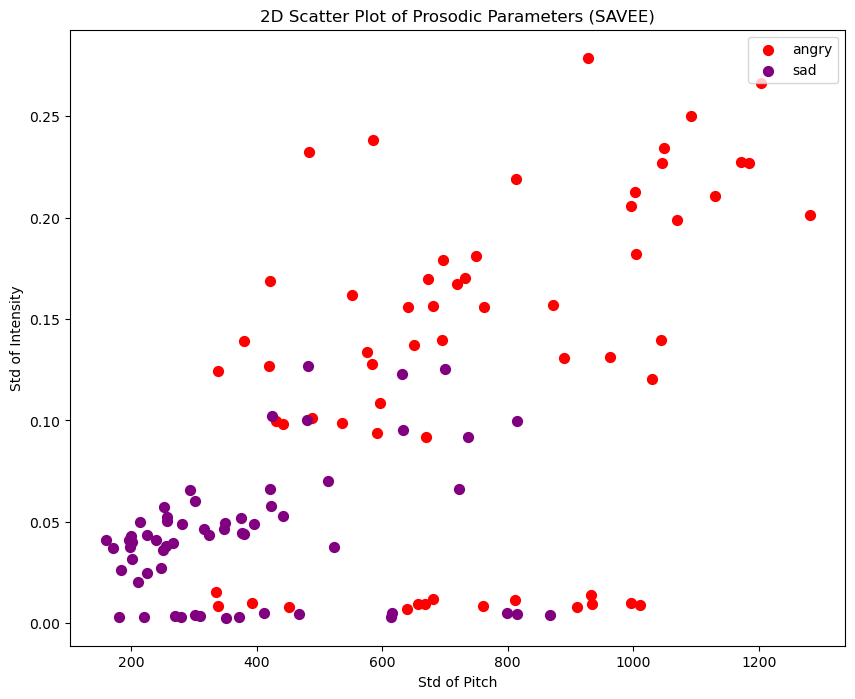

In [40]:
# Plotting the 2D scatter plot with different colors for each emotion
plt.figure(figsize=(10, 8))

# Scatter plot using the extracted features, with color based on emotion
for emotion in emotion_map.values():
    if emotion == "angry" or emotion == "sad":

        idx = [i for i, e in enumerate(emotions) if e == emotion]
        plt.scatter(std_pitches[idx], std_intensities[idx], 
                    c=color_map[emotion], label=emotion, s=50)

# Set labels and title
plt.xlabel('Std of Pitch')
plt.ylabel('Std of Intensity')
plt.title("2D Scatter Plot of Prosodic Parameters (SAVEE)")

# Add a legend
plt.legend()

# Display the plot
plt.show()

### TESS Data visualization

In [13]:
Tess = "./data/TESS/tess/tess/"

In [14]:
LABEL_DICT = {0:'fear', 1:'neutral', 2:'happy',3:'angry', 4:'disgust', 5:'surprise',6:'sad'}


In [15]:
emotion_map={0:'fear', 1:'neutral', 2:'happy',3:'angry', 4:'disgust', 5:'surprise',6:'sad'}

In [16]:

tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess +'/' +dir) # data/TESS_D/OAF_Fear
    for file in directories:  # OAF_page_fear.wav
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df.Emotions.value_counts())

reverse_label_dict = {v: k for k, v in LABEL_DICT.items()}
#Tess_df['Emotions'] = Tess_df['Emotions'].map(reverse_label_dict)


Tess_df.head()


Emotions
neutral     400
angry       400
disgust     400
surprise    400
happy       400
fear        400
sad         400
Name: count, dtype: int64


,Emotions,Path
0,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_hate_neu...
1,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_chat_neu...
2,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_lid_neut...
3,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_seize_ne...
4,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_beg_neut...


In [18]:
Tess_df

,Emotions,Path
0,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_hate_neu...
1,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_chat_neu...
2,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_lid_neut...
3,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_seize_ne...
4,neutral,./data/TESS/tess/tess/YAF_neutral/YAF_beg_neut...
...,...,...
2795,angry,./data/TESS/tess/tess/OAF_angry/OAF_fall_angry...
2796,angry,./data/TESS/tess/tess/OAF_angry/OAF_chair_angr...
2797,angry,./data/TESS/tess/tess/OAF_angry/OAF_keg_angry.wav
2798,angry,./data/TESS/tess/tess/OAF_angry/OAF_boat_angry...


In [45]:
# Initialize lists to hold features and emotions
std_pitches = []
std_intensities = []
emotions = []
for i in Tess_df.iterrows():
    
    emotion = i[1][0]
    path = i[1][1]
    if emotion == 'sad' or emotion == 'angry':

        if path.endswith('.wav'):
            std_pitch, std_intensity = extract_prosodic_features(path)
            std_pitches.append(std_pitch)
            std_intensities.append(std_intensity)
            emotions.append(emotion)
        
        
# Convert lists to torch tensors
std_pitches = torch.tensor(std_pitches)
std_intensities = torch.tensor(std_intensities)

/tmp/ipykernel_103875/1037942863.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  emotion = i[1][0]
/tmp/ipykernel_103875/1037942863.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path = i[1][1]


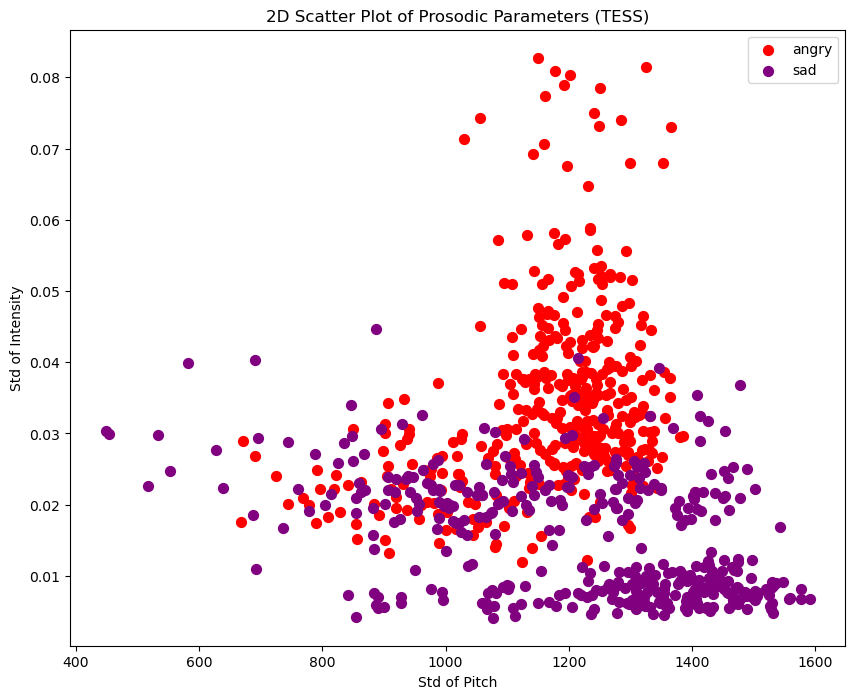

In [46]:
# Plotting the 2D scatter plot with different colors for each emotion
plt.figure(figsize=(10, 8))

# Scatter plot using the extracted features, with color based on emotion
for emotion in emotion_map.values():
    if emotion == "angry" or emotion == "sad":

        idx = [i for i, e in enumerate(emotions) if e == emotion]
        plt.scatter(std_pitches[idx], std_intensities[idx], 
                    c=color_map[emotion], label=emotion, s=50)

# Set labels and title
plt.xlabel('Std of Pitch')
plt.ylabel('Std of Intensity')
plt.title("2D Scatter Plot of Prosodic Parameters (TESS)")

# Add a legend
plt.legend()

# Display the plot
plt.show()

/tmp/ipykernel_216320/2164000165.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45)
/tmp/ipykernel_216320/2164000165.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45)
/tmp/ipykernel_216320/2164000165.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45)
/tmp/ipykernel_216320/2164000165.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45)
/tmp/ipykernel_216320/2164000165.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks

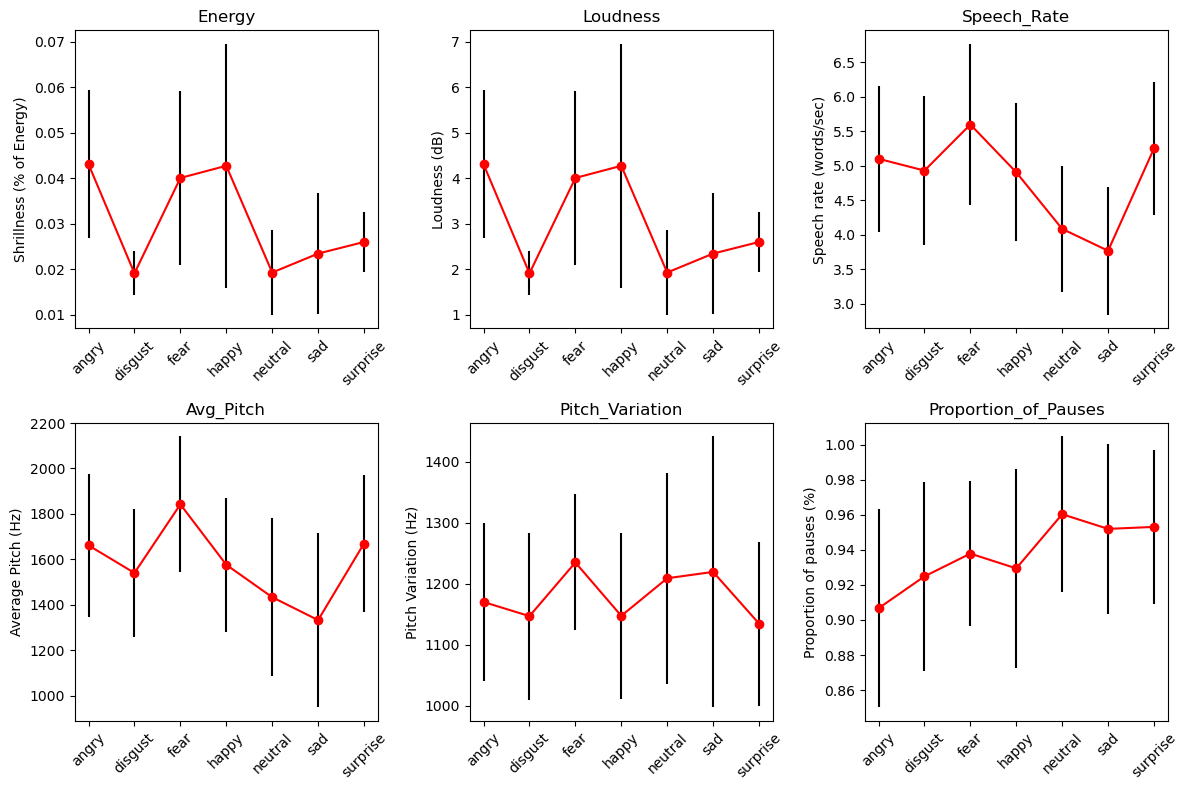

In [22]:
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define emotion mapping
emotion_map = {0:'fear', 1:'neutral', 2:'happy',3:'angry', 4:'disgust', 5:'surprise',6:'sad'}

# Load dataset (assuming Tess_df is already created)
# Extract features (example features: MFCC, pitch, loudness, etc.)
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    # Compute features
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)  # MFCC mean
    pitch, _ = librosa.piptrack(y=y, sr=sr)  # Pitch
    pitch_mean = np.mean(pitch[pitch > 0]) if np.any(pitch > 0) else 0
    pitch_std = np.std(pitch[pitch > 0]) if np.any(pitch > 0) else 0
    energy = np.mean(librosa.feature.rms(y=y))  # Energy
    loudness = librosa.feature.rms(y=y).mean() * 100  # Approximate loudness
    speech_rate = len(librosa.onset.onset_detect(y=y, sr=sr)) / (len(y) / sr)  # Speech rate
    
    # Proportion of pauses (ratio of silence duration to total duration)
    silent_intervals = librosa.effects.split(y, top_db=30)  # Detect silent intervals
    total_silence_duration = sum((end - start) / sr for start, end in silent_intervals)
    proportion_of_pauses = total_silence_duration / (len(y) / sr)

    return [pitch_mean, pitch_std, energy, loudness, speech_rate, proportion_of_pauses]

# Extract features for each file
features = []
for index, row in Tess_df.iterrows():
    file_path = row['Path']
    emotion = row['Emotions']
    feature_values = extract_features(file_path)
    features.append([emotion] + feature_values)

# Create DataFrame
feature_columns = ['Emotions', 'Avg_Pitch', 'Pitch_Variation', 'Energy', 'Loudness', 'Speech_Rate', 'Proportion_of_Pauses']
features_df = pd.DataFrame(features, columns=feature_columns)

# Aggregate statistics by emotion
grouped_df = features_df.groupby('Emotions').agg(['mean', 'std'])

# Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
feature_names = ['Energy', 'Loudness', 'Speech_Rate', 'Avg_Pitch', 'Pitch_Variation', 'Proportion_of_Pauses']
y_labels = ['Shrillness (% of Energy)', 'Loudness (dB)', 'Speech rate (words/sec)',
            'Average Pitch (Hz)', 'Pitch Variation (Hz)', 'Proportion of pauses (%)']

for i, ax in enumerate(axes.flat):
    means = grouped_df[(feature_names[i], 'mean')]
    stds = grouped_df[(feature_names[i], 'std')]
    
    ax.errorbar(means.index, means.values, yerr=stds.values, fmt='o-', color='red', ecolor='black')
    ax.set_xticklabels(means.index, rotation=45)
    ax.set_ylabel(y_labels[i])
    ax.set_title(feature_names[i])

plt.tight_layout()
plt.show()


/tmp/ipykernel_216320/232037738.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotions", y="Value", data=feature_data, ax=ax, palette="coolwarm", width=0.6)
/tmp/ipykernel_216320/232037738.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
/tmp/ipykernel_216320/232037738.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotions", y="Value", data=feature_data, ax=ax, palette="coolwarm", width=0.6)
/tmp/ipykernel_216320/232037738.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

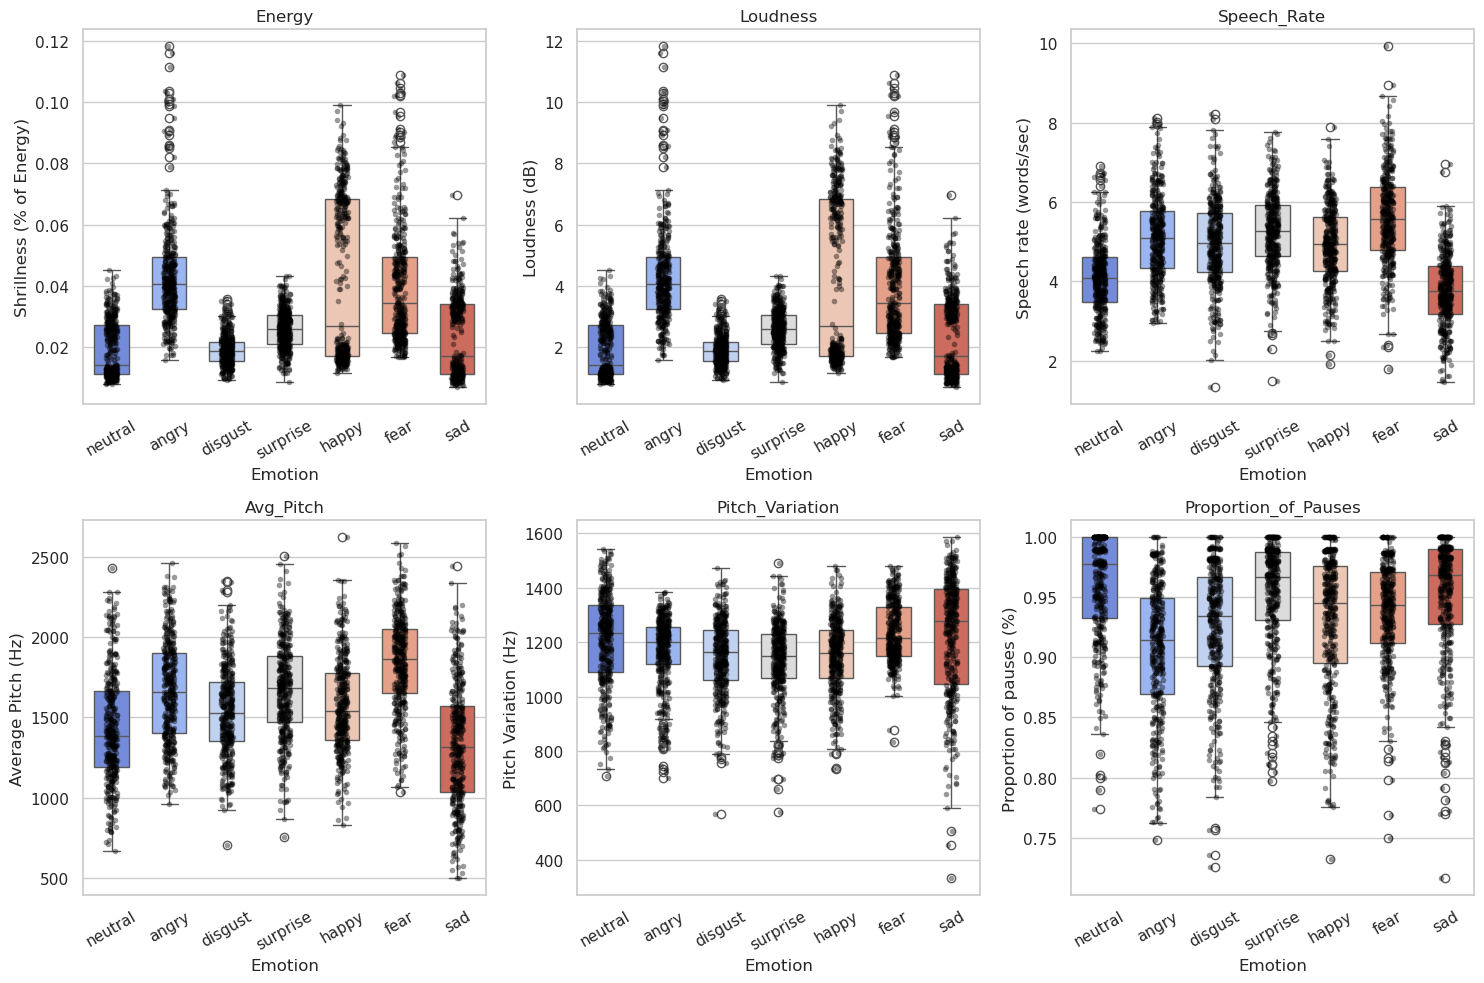

In [24]:
import os
import pandas as pd
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define emotion mapping
emotion_map = {0:'fear', 1:'neutral', 2:'happy',3:'angry', 4:'disgust', 5:'surprise',6:'sad'}

# Load dataset (assuming Tess_df is already created)
# Extract features (example features: MFCC, pitch, loudness, etc.)
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    # Compute features
    pitch, _ = librosa.piptrack(y=y, sr=sr)  # Pitch
    pitch_mean = np.mean(pitch[pitch > 0]) if np.any(pitch > 0) else 0
    pitch_std = np.std(pitch[pitch > 0]) if np.any(pitch > 0) else 0
    energy = np.mean(librosa.feature.rms(y=y))  # Energy
    loudness = librosa.feature.rms(y=y).mean() * 100  # Approximate loudness
    speech_rate = len(librosa.onset.onset_detect(y=y, sr=sr)) / (len(y) / sr)  # Speech rate
    
    # Proportion of pauses (ratio of silence duration to total duration)
    silent_intervals = librosa.effects.split(y, top_db=30)  # Detect silent intervals
    total_silence_duration = sum((end - start) / sr for start, end in silent_intervals)
    proportion_of_pauses = total_silence_duration / (len(y) / sr)

    return [pitch_mean, pitch_std, energy, loudness, speech_rate, proportion_of_pauses]

# Extract features for each file
features = []
for index, row in Tess_df.iterrows():
    file_path = row['Path']
    emotion = row['Emotions']
    feature_values = extract_features(file_path)
    features.append([emotion] + feature_values)

# Create DataFrame
feature_columns = ['Emotions', 'Avg_Pitch', 'Pitch_Variation', 'Energy', 'Loudness', 'Speech_Rate', 'Proportion_of_Pauses']
features_df = pd.DataFrame(features, columns=feature_columns)

# Melt DataFrame for Seaborn
melted_df = features_df.melt(id_vars="Emotions", var_name="Feature", value_name="Value")

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

feature_names = ['Energy', 'Loudness', 'Speech_Rate', 'Avg_Pitch', 'Pitch_Variation', 'Proportion_of_Pauses']
y_labels = ['Shrillness (% of Energy)', 'Loudness (dB)', 'Speech rate (words/sec)',
            'Average Pitch (Hz)', 'Pitch Variation (Hz)', 'Proportion of pauses (%)']

for i, ax in enumerate(axes.flat):
    feature_data = melted_df[melted_df["Feature"] == feature_names[i]]
    
    sns.boxplot(x="Emotions", y="Value", data=feature_data, ax=ax, palette="coolwarm", width=0.6)
    sns.stripplot(x="Emotions", y="Value", data=feature_data, ax=ax, color='black', alpha=0.4, jitter=True, size=4)
    
    ax.set_xlabel("Emotion")
    ax.set_ylabel(y_labels[i])
    ax.set_title(feature_names[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


/tmp/ipykernel_216320/3334651406.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45)
/tmp/ipykernel_216320/3334651406.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45)
/tmp/ipykernel_216320/3334651406.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45)
/tmp/ipykernel_216320/3334651406.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(means.index, rotation=45)
/tmp/ipykernel_216320/3334651406.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks

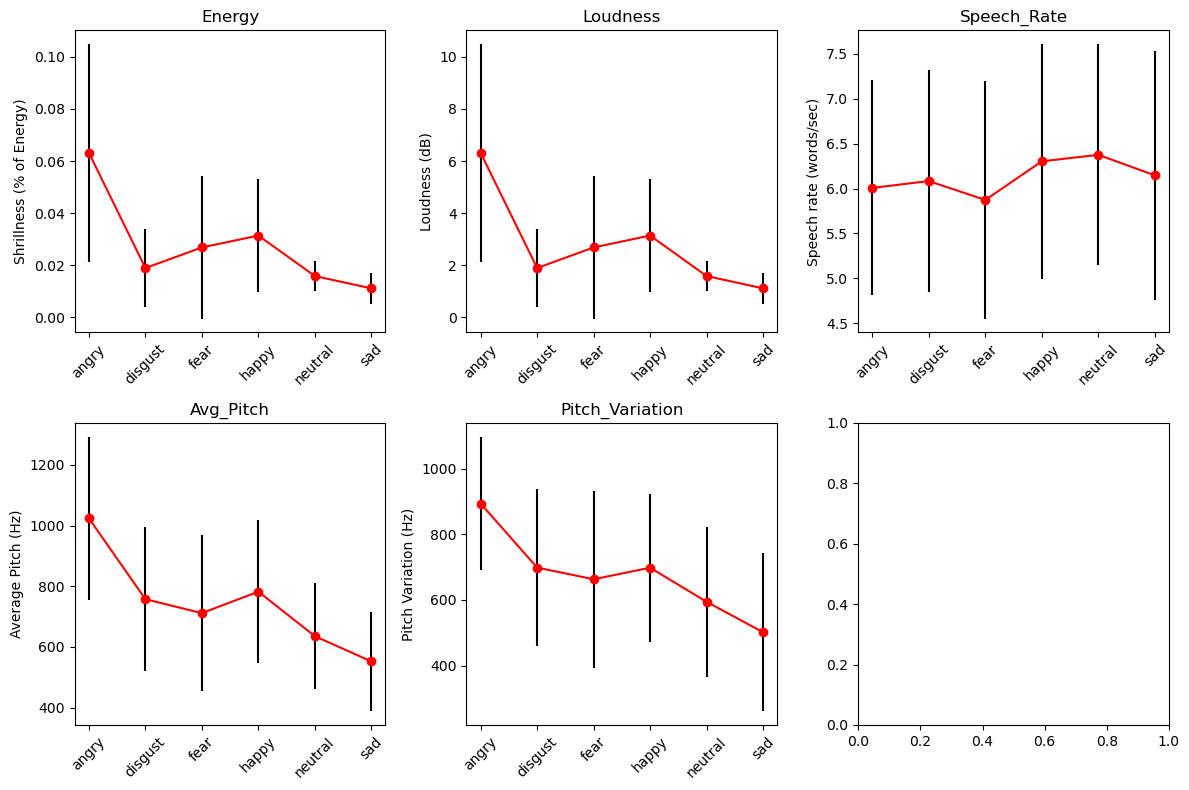

In [21]:
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define emotion mapping
#emotion_map = {0:'fear', 1:'neutral', 2:'happy',3:'angry', 4:'disgust', 5:'surprise',6:'sad'}
emotion_map = {'0':'fear', '1':'neutral', '2':'happy',
                '3':'angry', '4':'disgust', '5':'surprise','6':'sad'}
# Load dataset (assuming Tess_df is already created)
# Extract features (example features: MFCC, pitch, loudness, etc.)
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    # Compute features
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)  # MFCC mean
    pitch, _ = librosa.piptrack(y=y, sr=sr)  # Pitch
    pitch_mean = np.mean(pitch[pitch > 0]) if np.any(pitch > 0) else 0
    pitch_std = np.std(pitch[pitch > 0]) if np.any(pitch > 0) else 0
    energy = np.mean(librosa.feature.rms(y=y))  # Energy
    loudness = librosa.feature.rms(y=y).mean() * 100  # Approximate loudness
    speech_rate = len(librosa.onset.onset_detect(y=y, sr=sr)) / (len(y) / sr)  # Speech rate
    
    return [pitch_mean, pitch_std, energy, loudness, speech_rate]

# Extract features for each file
features = []
for index, row in Crema_df.iterrows():
    file_path = row['Path']
    emotion = row['Emotions']
    feature_values = extract_features(file_path)
    features.append([emotion] + feature_values)

# Create DataFrame
feature_columns = ['Emotions', 'Avg_Pitch', 'Pitch_Variation', 'Energy', 'Loudness', 'Speech_Rate']
features_df = pd.DataFrame(features, columns=feature_columns)

# Aggregate statistics by emotion
grouped_df = features_df.groupby('Emotions').agg(['mean', 'std'])

# Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
feature_names = ['Energy', 'Loudness', 'Speech_Rate', 'Avg_Pitch', 'Pitch_Variation']
y_labels = ['Shrillness (% of Energy)', 'Loudness (dB)', 'Speech rate (words/sec)',
            'Average Pitch (Hz)', 'Pitch Variation (Hz)']

for i, ax in enumerate(axes.flat[:5]):
    means = grouped_df[(feature_names[i], 'mean')]
    stds = grouped_df[(feature_names[i], 'std')]
    
    ax.errorbar(means.index, means.values, yerr=stds.values, fmt='o-', color='red', ecolor='black')
    ax.set_xticklabels(means.index, rotation=45)
    ax.set_ylabel(y_labels[i])
    ax.set_title(feature_names[i])

plt.tight_layout()
plt.show()


/tmp/ipykernel_216320/2331339211.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotions", y="Value", data=feature_data, ax=ax, palette="coolwarm", width=0.6)
/tmp/ipykernel_216320/2331339211.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
/tmp/ipykernel_216320/2331339211.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Emotions", y="Value", data=feature_data, ax=ax, palette="coolwarm", width=0.6)
/tmp/ipykernel_216320/2331339211.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

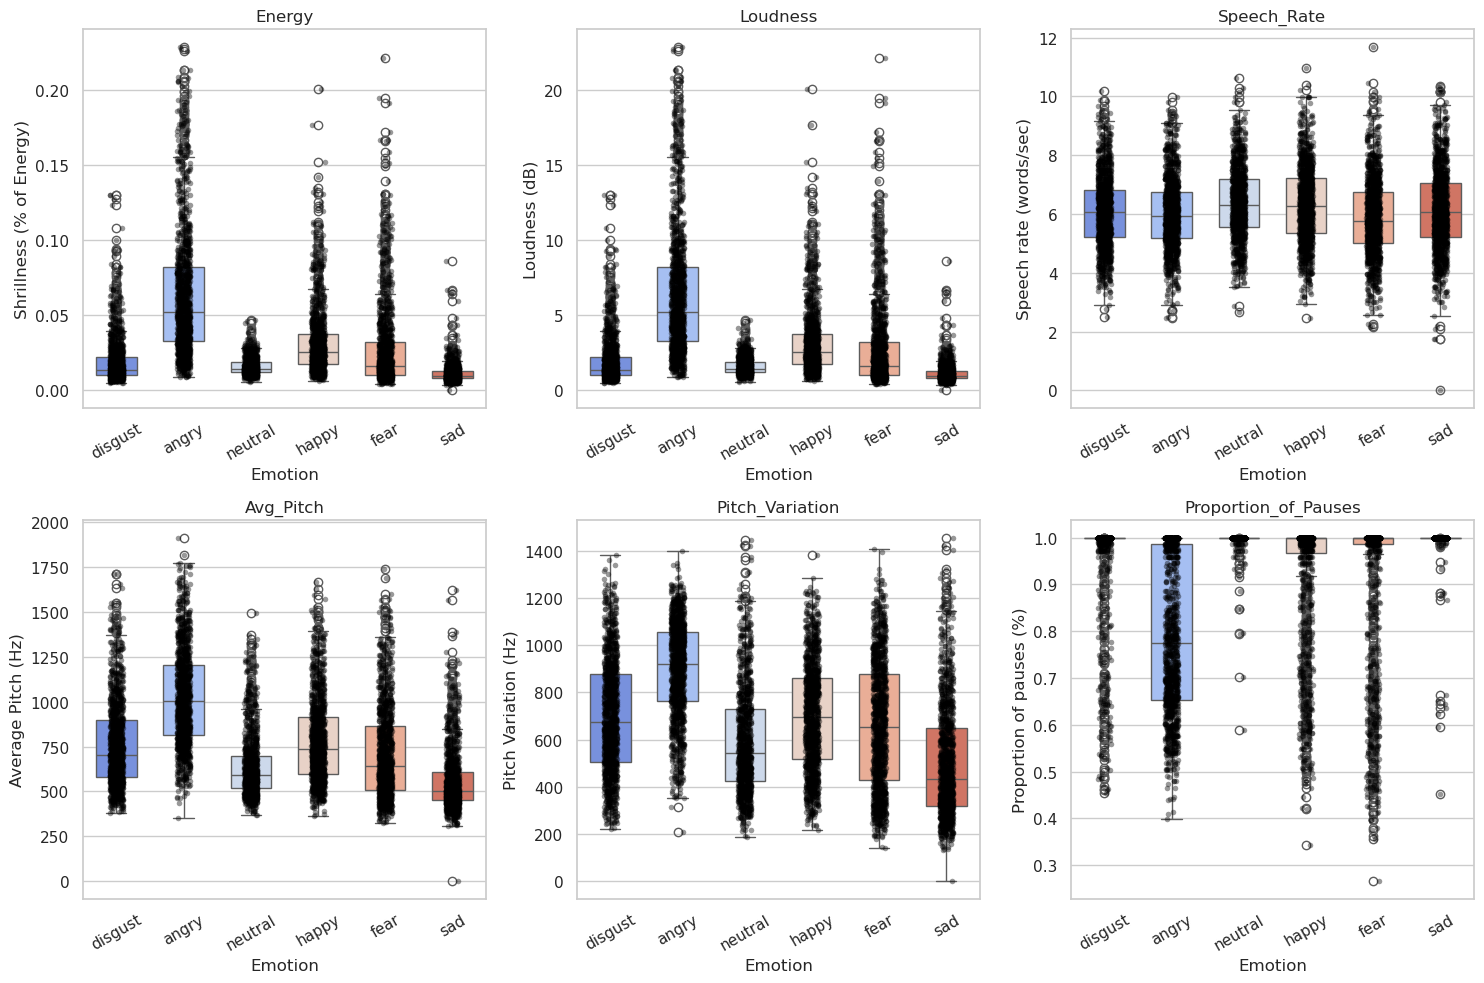

In [25]:
import os
import pandas as pd
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define emotion mapping
emotion_map = {'0':'fear', '1':'neutral', '2':'happy',
                '3':'angry', '4':'disgust', '5':'surprise','6':'sad'}

# Load dataset (assuming Tess_df is already created)
# Extract features (example features: MFCC, pitch, loudness, etc.)
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    # Compute features
    pitch, _ = librosa.piptrack(y=y, sr=sr)  # Pitch
    pitch_mean = np.mean(pitch[pitch > 0]) if np.any(pitch > 0) else 0
    pitch_std = np.std(pitch[pitch > 0]) if np.any(pitch > 0) else 0
    energy = np.mean(librosa.feature.rms(y=y))  # Energy
    loudness = librosa.feature.rms(y=y).mean() * 100  # Approximate loudness
    speech_rate = len(librosa.onset.onset_detect(y=y, sr=sr)) / (len(y) / sr)  # Speech rate
    
    # Proportion of pauses (ratio of silence duration to total duration)
    silent_intervals = librosa.effects.split(y, top_db=30)  # Detect silent intervals
    total_silence_duration = sum((end - start) / sr for start, end in silent_intervals)
    proportion_of_pauses = total_silence_duration / (len(y) / sr)

    return [pitch_mean, pitch_std, energy, loudness, speech_rate, proportion_of_pauses]

# Extract features for each file
features = []
for index, row in Crema_df.iterrows():
    file_path = row['Path']
    emotion = row['Emotions']
    feature_values = extract_features(file_path)
    features.append([emotion] + feature_values)

# Create DataFrame
feature_columns = ['Emotions', 'Avg_Pitch', 'Pitch_Variation', 'Energy', 'Loudness', 'Speech_Rate', 'Proportion_of_Pauses']
features_df = pd.DataFrame(features, columns=feature_columns)

# Melt DataFrame for Seaborn
melted_df = features_df.melt(id_vars="Emotions", var_name="Feature", value_name="Value")

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

feature_names = ['Energy', 'Loudness', 'Speech_Rate', 'Avg_Pitch', 'Pitch_Variation', 'Proportion_of_Pauses']
y_labels = ['Shrillness (% of Energy)', 'Loudness (dB)', 'Speech rate (words/sec)',
            'Average Pitch (Hz)', 'Pitch Variation (Hz)', 'Proportion of pauses (%)']

for i, ax in enumerate(axes.flat):
    feature_data = melted_df[melted_df["Feature"] == feature_names[i]]
    
    sns.boxplot(x="Emotions", y="Value", data=feature_data, ax=ax, palette="coolwarm", width=0.6)
    sns.stripplot(x="Emotions", y="Value", data=feature_data, ax=ax, color='black', alpha=0.4, jitter=True, size=4)
    
    ax.set_xlabel("Emotion")
    ax.set_ylabel(y_labels[i])
    ax.set_title(feature_names[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()
